In [1]:
# importing data from skimage 
from skimage import data 
from skimage import io 

# Section 01: Introducing Image Processing and scikit-image

## Is this gray or full of color?
Whats the main difference between the images shown below?

![](./coffeandcoins.png)

These images have been preloaded as coffee_image and coins_image from the scikit-image data module using:

```python
coffee_image = data.coffee()
coins_image = data.coins()
```

Choose the right answer that best describes the main difference related to color and dimensional structure.

In the console, use the function shape() from NumPy, to obtain the image shape (Height, Width, Dimensions) and find out. NumPy is already imported as np.

In [2]:
coffee_image = data.coffee()
coins_image = data.coins()

In [3]:
coffee_image.shape

(400, 600, 3)

In [4]:
coins_image.shape

(303, 384)

## RGB to grayscale
In this exercise you will load an image from scikit-image module data and make it grayscale, then compare both of them in the output.

We have preloaded a function show_image(image, title='Image') that displays the image using Matplotlib. You can check more about its parameters using ?show_image() or help(show_image) in the console.

![](./rocket.png)

In [5]:
import matplotlib.pyplot as plt 

def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

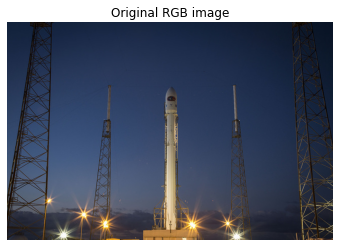

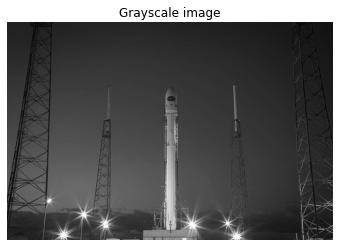

In [6]:
# Import the modules from skimage
from skimage import data, color

# Load the rocket image
rocket = data.rocket()

# Convert the image to grayscale
gray_scaled_rocket = color.rgb2gray(rocket)

# Show the original image
show_image(rocket, 'Original RGB image')

# Show the grayscale image
show_image(gray_scaled_rocket, 'Grayscale image')

## Flipping out
As a prank, someone has turned an image from a photo album of a trip to Seville upside-down and back-to-front! Now, we need to straighten the image, by flipping it.

![](./sevilleup\(2\).jpg)

Image loaded as flipped_seville.

Using the NumPy methods learned in the course, flip the image horizontally and vertically. Then display the corrected image using the show_image() function.
NumPy is already imported as np.

In [7]:
import numpy as np 

flipped_seville = io.imread('./sevilleup(2).jpg')

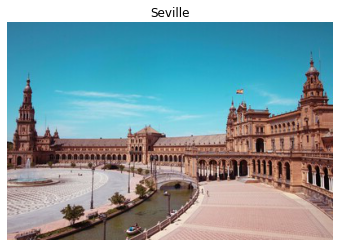

In [8]:
# Flip the image vertically
seville_vertical_flip = np.flipud(flipped_seville)

# Flip the image horizontally
seville_horizontal_flip = np.fliplr(seville_vertical_flip)

# Show the resulting image
show_image(seville_horizontal_flip, 'Seville')

## Histograms
In this exercise, you will analyze the amount of red in the image. To do this, the histogram of the red channel will be computed for the image shown below:

![](./4.1.01.jpg)

Image loaded as image.

Extracting information from images is a fundamental part of image enhancement. This way you can balance the red and blue to make the image look colder or warmer.

You will use hist() to display the 256 different intensities of the red color. And ravel() to make these color values an array of one flat dimension.

Matplotlib is preloaded as plt and Numpy as np.

Remember that if we want to obtain the green color of an image we would do the following:

```python
green = image[:, :, 1]
```

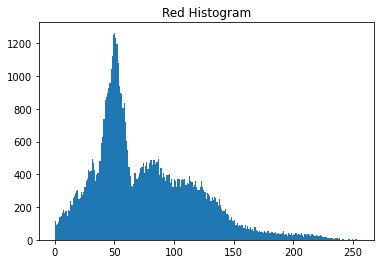

In [9]:
image = io.imread('./4.1.01.jpg')

# Obtain the red channel
red_channel = image[:, :, 0]

# Plot the red histogram with bins in a range of 256
plt.hist(red_channel.ravel(), bins=256)

# Set title and show
plt.title('Red Histogram')
plt.show()

## Apply global thresholding
In this exercise, you'll transform a photograph to binary so you can separate the foreground from the background.

To do so, you need to import the required modules, load the image, obtain the optimal thresh value using threshold_otsu() and apply it to the image.

You'll see the resulting binarized image when using the show_image() function, previously explained.

![](./bw.jpg)

Image loaded as chess_pieces_image.

Remember we have to turn colored images to grayscale. For that we will use the rgb2gray() function learned in previous video. Which has already been imported for you.

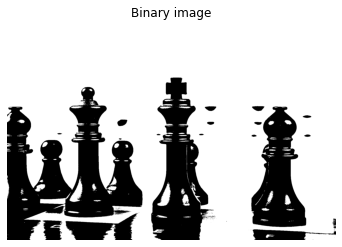

In [10]:
# Import the otsu threshold function
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray

# Read image from file
chess_pieces_image = io.imread('./bw.jpg')

# Make the image grayscale using rgb2gray
chess_pieces_image_gray = rgb2gray(chess_pieces_image)

# Obtain the optimal threshold value with otsu
thresh = threshold_otsu(chess_pieces_image_gray)

# Apply thresholding to the image
binary = thresh < chess_pieces_image_gray

# Show the image
show_image(binary, 'Binary image')

## When the background isn't that obvious
Sometimes, it isn't that obvious to identify the background. If the image background is relatively uniform, then you can use a global threshold value as we practiced before, using threshold_otsu(). However, if there's uneven background illumination, adaptive thresholding threshold_local() (a.k.a. local thresholding) may produce better results.

In this exercise, you will compare both types of thresholding methods (global and local), to find the optimal way to obtain the binary image we need.

![](./text_page_original.png)

Image loaded as page_image.

In [11]:
page_image = data.text()

print(page_image)

[[ 91  94  99 ... 135 135 134]
 [ 99 104 104 ... 141 141 139]
 [105 109 109 ... 145 142 141]
 ...
 [146 146 141 ... 142 142 142]
 [144 140 141 ... 146 141 136]
 [145 136 143 ... 143 134 126]]


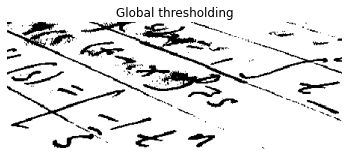

In [12]:
# Import the otsu threshold function
from skimage.filters import threshold_otsu

# Obtain the optimal otsu global thresh value
global_thresh = threshold_otsu(page_image)

# Obtain the binary image by applying global thresholding
binary_global = page_image > global_thresh

# Show the binary image obtained
show_image(binary_global, 'Global thresholding')

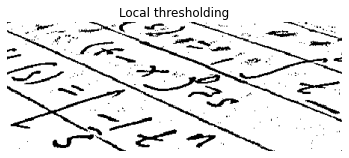

In [13]:
# Import the local threshold function
from skimage.filters import threshold_local

# Set the block size to 35
block_size = 35

# Obtain the optimal local thresholding
local_thresh = threshold_local(page_image, block_size, offset=10)

# Obtain the binary image by applying local thresholding
binary_local = page_image > local_thresh

# Show the binary image
show_image(binary_local, 'Local thresholding')

## Trying other methods
As we saw in the video, not being sure about what thresholding method to use isn't a problem. In fact, scikit-image provides us with a function to check multiple methods and see for ourselves what the best option is. It returns a figure comparing the outputs of different global thresholding methods.

![](./fruits-2.jpg)

Image loaded as fruits_image.

You will apply this function to this image, matplotlib.pyplot has been loaded as plt. Remember that you can use try_all_threshold() to try multiple global algorithms.

In [14]:
fruits_image = io.imread('./fruits-2.jpg')

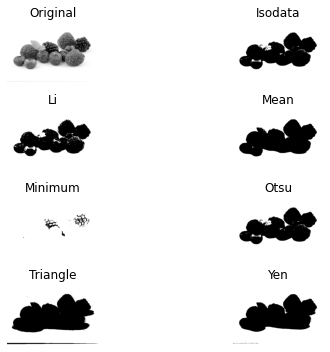

In [15]:
# Import the try all function
from skimage.filters import try_all_threshold

# Import the rgb to gray convertor function 
from skimage.color import rgb2gray

# Turn the fruits_image to grayscale
grayscale = rgb2gray(fruits_image)

# Use the try all method on the resulting grayscale image
fig, ax = try_all_threshold(grayscale, verbose=False)

# Show the resulting plots
plt.show()

## Apply thresholding
In this exercise, you will decide what type of thresholding is best used to binarize an image of knitting and craft tools. In doing so, you will be able to see the shapes of the objects, from paper hearts to scissors more clearly.

![](./shapes52.jpg)

Image loaded as tools_image.
What type of thresholding would you use judging by the characteristics of the image? Is the background illumination and intensity even or uneven?

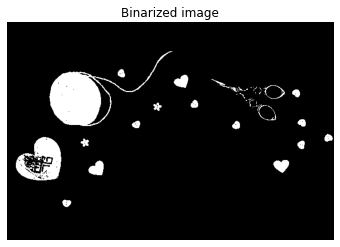

In [16]:
# Import threshold and gray convertor functions
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray

# Read image
tools_image = io.imread('./shapes52.jpg')

# Turn the image grayscale
gray_tools_image = rgb2gray(tools_image)

# Obtain the optimal thresh
thresh = threshold_otsu(gray_tools_image)

# Obtain the binary image by applying thresholding
binary_image = gray_tools_image > thresh

# Show the resulting binary image
show_image(binary_image, 'Binarized image')